In [1]:
#import statements
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
import datetime
!pip install geopy
from geopy.geocoders import Nominatim
from geopy.geocoders import ArcGIS
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
!pip install folium
import folium
from folium import plugins
from datetime import datetime

In [2]:
#loads locations of police stations
police_locations = pd.read_csv("Police_Stations.csv")
police_locations.head(2)

,DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,1,Central,1718 S State St,Chicago,IL,60616,http://home.chicagopolice.org/community/distri...,312-745-4290,312-745-3694,312-745-3693,1176569.052,1891771.704,41.858373,-87.627356,"(41.8583725929, -87.627356171)"
1,2,Wentworth,5101 S Wentworth Ave,Chicago,IL,60609,http://home.chicagopolice.org/community/distri...,312-747-8366,312-747-5396,312-747-6656,1175864.837,1871153.753,41.801811,-87.630560,"(41.8018110912, -87.6305601801)"


In [3]:
#loads parking data csv takes long time to run. Uncomment out it is needed to be ran.
parking_data = pd.read_csv("Filtered_Data_2015.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (6,18,19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Loads csv Files of the Different Days

In [4]:
#upload dec 26, 2017 completed file of info included lat and long
 single_day= pd.read_csv("/Users/michael/Desktop/SpringboardDS/Chicago_Parking_Ticket/Full_Dataset.csv")

In [5]:
#upload dec, 16 2017
december_saturday= pd.read_csv("/Users/michael/Desktop/SpringboardDS/Chicago_Parking_Ticket/december_saturday_Full_Dataset.csv")

In [6]:
#upload June 9 csv
june_friday=pd.read_csv("/Users/michael/Desktop/SpringboardDS/Chicago_Parking_Ticket/Full_Dataset_Friday_June2.csv")

In [7]:
#upload June 10 2017 csv
june_saturday=pd.read_csv("/Users/michael/Desktop/SpringboardDS/Chicago_Parking_Ticket/Full_Dataset_June_Saturday.csv")

# Creates new zipcode as well as latitude and longitude lines
The next four cells don't need to be ran except generating lat, long and zipcode

In [8]:
#dec 16 2017
#built the new zipcode, latitude and longitude
zipcodes = []
latitudes = []
longitudes = []

#for ticket_address in single_day['violation_location']:
    print(ticket_address)
    address = '{}, Chicago, IL'.format(ticket_address)
    
    geolocator = ArcGIS()
    location = geolocator.geocode(address, timeout=1000)
    latitudes.append(location[1][0])
    longitudes.append(location[1][1])
    try:
        zipcode = int(location[0].split()[-1].rstrip(','))
    except:
        location = geolocator.reverse(location[1], timeout=1000)
        zipcode = int(location[0].split()[-2].rstrip(','))
        
    zipcodes.append(zipcode)



single_day.loc[:, 'new_zipcodes'] = pd.Series(zipcodes)
december_saturday.loc[:, 'latitudes'] = pd.Series(latitudes)
december_saturday.loc[:, 'longitudes'] = pd.Series(longitudes)



december_saturday.to_csv('december_saturday_Full_Dataset.csv')

IndentationError: unexpected indent (<ipython-input-8-2a1e4f8866b2>, line 8)

In [ ]:
#dec 26 2017
#built the new zipcode, latitude and longitude
zipcodes = []
latitudes = []
longitudes = []

#for ticket_address in single_day['violation_location']:
    print(ticket_address)
    address = '{}, Chicago, IL'.format(ticket_address)
    
    geolocator = ArcGIS()
    location = geolocator.geocode(address, timeout=1000)
    latitudes.append(location[1][0])
    longitudes.append(location[1][1])
    try:
        zipcode = int(location[0].split()[-1].rstrip(','))
    except:
        location = geolocator.reverse(location[1], timeout=1000)
        zipcode = int(location[0].split()[-2].rstrip(','))
        
    zipcodes.append(zipcode)



single_day.loc[:, 'new_zipcodes'] = pd.Series(zipcodes)
single_day.loc[:, 'latitudes'] = pd.Series(latitudes)
single_day.loc[:, 'longitudes'] = pd.Series(longitudes)



single_day.to_csv('Full_Dataset.csv')

In [ ]:
#june 9 2017   june_friday
zipcodes = []
latitudes = []
longitudes = []

#for ticket_address in june_friday['violation_location']:
    print(ticket_address)
    address = '{}, Chicago, IL'.format(ticket_address)
    
    geolocator = ArcGIS()
    location = geolocator.geocode(address, timeout=1000)
    latitudes.append(location[1][0])
    longitudes.append(location[1][1])
    try:
        zipcode = int(location[0].split()[-1].rstrip(','))
    except:
        location = geolocator.reverse(location[1], timeout=1000)
        zipcode = int(location[0].split()[-2].rstrip(','))
        
    zipcodes.append(zipcode)



june_friday.loc[:, 'new_zipcodes'] = pd.Series(zipcodes)
june_friday.loc[:, 'latitudes'] = pd.Series(latitudes)
june_friday.loc[:, 'longitudes'] = pd.Series(longitudes)



june_friday.to_csv('Full_Dataset_Friday_June2.csv')

In [ ]:
#june 10 2017 june_saturday
zipcodes = []
latitudes = []
longitudes = []

#for ticket_address in june_saturday['violation_location']:
    print(ticket_address)
    address = '{}, Chicago, IL'.format(ticket_address)
    
    geolocator = ArcGIS()
    location = geolocator.geocode(address, timeout=1000)
    latitudes.append(location[1][0])
    longitudes.append(location[1][1])
    try:
        zipcode = int(location[0].split()[-1].rstrip(','))
    except:
        location = geolocator.reverse(location[1], timeout=1000)
        zipcode = int(location[0].split()[-2].rstrip(','))
        
    zipcodes.append(zipcode)



june_saturday.loc[:, 'new_zipcodes'] = pd.Series(zipcodes)
june_saturday.loc[:, 'latitudes'] = pd.Series(latitudes)
june_saturday.loc[:, 'longitudes'] = pd.Series(longitudes)



june_saturday.to_csv('Full_Dataset_June_Saturday.csv')

# Creates seperate days of data frames

In [9]:
#pulls data for Dec 26 th Tuesday
#import csv file below
#single_day = parking_data[(parking_data['issue_date'] >= "2017-12-26") & (parking_data['issue_date'] < "2017-12-27")]
single_day.reset_index(inplace=True, drop=True)

In [10]:
#pulls data for Dec 16 weekend
#import file below
december_saturday = parking_data[(parking_data['issue_date'] >= "2017-12-16") & (parking_data['issue_date'] < "2017-12-17")]
december_saturday.reset_index(inplace=True, drop=True)

In [11]:
#june 9, 2017 Friday
#import file below
#june_friday = parking_data[(parking_data['issue_date'] >= "2017-06-09") & (parking_data['issue_date'] < "2017-06-10")]
june_friday.reset_index(inplace=True, drop=True)

In [12]:
#june 10, 2017 Saturday
#import file below
#june_saturday=parking_data[(parking_data['issue_date'] >= "2017-06-10") & (parking_data['issue_date'] < "2017-06-11")]
june_saturday.reset_index(inplace=True, drop=True)

# creates data frames for winter and summer seasons

In [13]:
#nov 2017 to january 2018
winter = parking_data[(parking_data['issue_date'] >= "2017-1-01") & (parking_data['issue_date'] < "2018-1-31")]
single_day.reset_index(inplace=True, drop=True)

In [14]:
# june through august 2017
summer = parking_data[(parking_data['issue_date'] >= "2017-06-01") & (parking_data['issue_date'] < "2017-08-30")]
single_day.reset_index(inplace=True, drop=True)

# creat datetime columns for csv file

In [15]:
#creates Datetime column
single_day['Datetime'] = pd.to_datetime(single_day['issue_date'])

In [16]:
#converts issue_date column to date time type for the single day data frame
single_day.issue_date = pd.to_datetime(single_day.issue_date)

In [17]:
#converts date time to datetime object
single_day['Datetime'] = pd.to_datetime(single_day['issue_date'])

In [18]:
#produces hour column
single_day['hour'] = single_day.issue_date.dt.hour

In [19]:
#converts issue_date column to date time type june_friday
june_friday.issue_date = pd.to_datetime(june_friday.issue_date)

In [20]:
#creates Datetime column june_friday
june_friday['Datetime'] = pd.to_datetime(june_friday['issue_date'])

In [21]:
#produces hour column june_friday
june_friday['hour'] = single_day.issue_date.dt.hour

In [22]:
#check to see hour and Datetime columns work correctly
single_day.head(3)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,latitudes,longitudes,Datetime,hour,new_zipcodes
0,0,0,0,9192680820,2017-12-16,3473 N CLARK,64746252b5c6e9ba5f5aab9e2b3b2b902ec05eec0de158...,IL,PAS,60633.0,0964080B,NO STANDING/PARKING TIME RESTRICTED,502,DOF,NISS,100,200,0.0,100.0,Paid,2018-02-06 00:00:00,DETR,NaN,5207011090,1109,"3400 n clark, chicago, il",41.945392,-87.655015,2017-12-16,0,60657
1,1,1,1,68894996,2017-12-16,2410 W CATALPA,afd361aee0cad191ecb238a7abebd592f8cdabf87196dc...,IL,PAS,60625.0,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",20,CPD,NISS,200,400,0.0,200.0,Paid,2018-01-26 00:00:00,VIOL,NaN,5210312890,9014,"2400 w catalpa, chicago, il",41.981467,-87.690062,2017-12-16,0,60625
2,2,2,2,9192716841,2017-12-16,23 W HUBBARD ST,f289d12483fab8c2390391f66c263ff955ddc460e265bf...,IL,PAS,607071735.0,0964080B,NO STANDING/PARKING TIME RESTRICTED,502,DOF,HOND,100,200,200.0,0.0,Notice,2017-12-21 00:00:00,FINL,NaN,5208926530,1627,"1 w hubbard st, chicago, il",41.890037,-87.628991,2017-12-16,0,60654


In [23]:
single_day.dtypes

Unnamed: 0                        int64
Unnamed: 0.1                      int64
Unnamed: 0.1.1                    int64
ticket_number                     int64
issue_date               datetime64[ns]
violation_location               object
license_plate_number             object
license_plate_state              object
license_plate_type               object
zipcode                         float64
violation_code                   object
violation_description            object
unit                              int64
unit_description                 object
vehicle_make                     object
fine_level1_amount                int64
fine_level2_amount                int64
current_amount_due              float64
total_payments                  float64
ticket_queue                     object
ticket_queue_date                object
notice_level                     object
hearing_disposition              object
notice_number                     int64
officer                          object


In [24]:
#dropping columns here
#single_day.drop('Unnamed: 0', axis=1)
single_day.drop('license_plate_number', axis=1)
single_day.drop('vehicle_make', axis = 1)
single_day.drop('license_plate_number', axis=1)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ticket_number,issue_date,violation_location,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,latitudes,longitudes,Datetime,hour,new_zipcodes
0,0,0,0,9192680820,2017-12-16 00:00:00,3473 N CLARK,IL,PAS,60633.0,0964080B,NO STANDING/PARKING TIME RESTRICTED,502,DOF,NISS,100,200,0.0,100.0,Paid,2018-02-06 00:00:00,DETR,NaN,5207011090,1109,"3400 n clark, chicago, il",41.945392,-87.655015,2017-12-16 00:00:00,0,60657
1,1,1,1,68894996,2017-12-16 00:00:00,2410 W CATALPA,IL,PAS,60625.0,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",20,CPD,NISS,200,400,0.0,200.0,Paid,2018-01-26 00:00:00,VIOL,NaN,5210312890,9014,"2400 w catalpa, chicago, il",41.981467,-87.690062,2017-12-16 00:00:00,0,60625
2,2,2,2,9192716841,2017-12-16 00:00:00,23 W HUBBARD ST,IL,PAS,607071735.0,0964080B,NO STANDING/PARKING TIME RESTRICTED,502,DOF,HOND,100,200,200.0,0.0,Notice,2017-12-21 00:00:00,FINL,NaN,5208926530,1627,"1 w hubbard st, chicago, il",41.890037,-87.628991,2017-12-16 00:00:00,0,60654
3,3,3,3,68747771,2017-12-16 00:01:00,3616 E 107TH ST,IL,PAS,606176701.0,0964150B,PARKING/STANDING PROHIBITED ANYTIME,4,CPD,GMC,75,150,0.0,75.0,Paid,2018-01-06 00:00:00,VIOL,NaN,5177215050,17916,"3600 e 107th st, chicago, il",41.700986,-87.535746,2017-12-16 00:01:00,0,60617
4,4,4,4,68683501,2017-12-16 00:01:00,8435 S DREXEL,IL,PAS,604151666.0,0976160B,EXPIRED PLATE OR TEMPORARY REGISTRATION,6,CPD,NISS,60,120,146.4,0.0,Notice,2017-12-28 00:00:00,SEIZ,NaN,5190742630,15972,"8400 s drexel, chicago, il",41.741100,-87.602481,2017-12-16 00:01:00,0,60619
5,5,5,5,9192700370,2017-12-16 00:02:00,1200 N PAULINA,IL,PAS,60622.0,0964100G,STOP SIGN OR TRAFFIC SIGNAL,502,DOF,CHEV,60,120,120.0,0.0,Notice,2017-12-21 00:00:00,FINL,NaN,5210023440,1565,"1200 n paulina, chicago, il",41.903336,-87.670489,2017-12-16 00:02:00,0,60622
6,6,6,6,9192680821,2017-12-16 00:02:00,3463 N CLARK,IL,PAS,606252442.0,0964080B,NO STANDING/PARKING TIME RESTRICTED,502,DOF,INFI,100,200,0.0,100.0,Paid,2018-01-14 00:00:00,VIOL,NaN,5181121540,1109,"3400 n clark, chicago, il",41.945151,-87.654817,2017-12-16 00:02:00,0,60657
7,7,7,7,68786468,2017-12-16 00:02:00,2611 N CENTRAL,IL,TMP,NaN,0976160B,EXPIRED PLATE OR TEMPORARY REGISTRATION,25,CPD,TOYT,60,120,60.0,0.0,Define,2018-01-02 00:00:00,NaN,NaN,0,11202,"2600 n central, chicago, il",41.927879,-87.766075,2017-12-16 00:02:00,0,60639
8,8,8,8,69020784,2017-12-16 00:02:00,2600 W FULLERTON,IL,PAS,606083610.0,0976160B,EXPIRED PLATE OR TEMPORARY REGISTRATION,14,CPD,FORD,60,120,0.0,60.0,Paid,2018-01-29 00:00:00,DETR,NaN,5200724340,13954,"2600 w fullerton, chicago, il",41.924884,-87.692741,2017-12-16 00:02:00,0,60647
9,9,9,9,9192713447,2017-12-16 00:03:00,228 S WABASH AV,IL,PAS,600761425.0,0964190B,EXPIRED METER CENTRAL BUSINESS DISTRICT,502,DOF,TOYT,65,130,0.0,65.0,Paid,2017-12-21 00:00:00,NaN,NaN,5210102660,1639,"200 s wabash av, chicago, il",41.878638,-87.626099,2017-12-16 00:03:00,0,60604


In [25]:
# total tickets issued in summer months of 2017
ticket_issuer = list,summer['officer'].value_counts().keys().tolist()
counts = summer['officer'].value_counts().tolist()
print(summer['officer'].value_counts().head(2))

716    7229
638    5860
Name: officer, dtype: int64


In [26]:
# total number of officers who issued tickets 2007 to 2018
ticket_issuer = list,parking_data['officer'].value_counts().keys().tolist()
counts = parking_data['officer'].value_counts().tolist()
print(parking_data['officer'].value_counts().head(2))

716    75303
638    57387
Name: officer, dtype: int64


In [27]:
# This is the number of states/countries/providences 
#that are represented
mask = parking_data.officer.nunique()
print('This many unique states were issued tickets Dec 26 2017 was',mask)

This many unique states were issued tickets Dec 26 2017 was 19432


In [28]:
#total tickets issuend in winter months
ticket_issuer = list,winter['officer'].value_counts().keys().tolist()
counts = winter['officer'].value_counts().tolist()
print(winter['officer'].value_counts().head(2))

      

716    13135
638    11029
Name: officer, dtype: int64


In [29]:
#this is a break down of who issued the tickets

ticket_issuer = list,single_day['officer'].value_counts().keys().tolist()
counts = single_day['officer'].value_counts().tolist()
print(single_day['officer'].value_counts().head())

1630    128
820      87
813      83
808      77
1623     76
Name: officer, dtype: int64


# Who issued the most tickets

In [30]:
#total for officer 716
ticket_issuer = list,parking_data['officer'].value_counts().keys().tolist()
counts = parking_data['officer'].value_counts().tolist()
print(parking_data['officer'].value_counts().head())

716    75303
638    57387
737    51156
723    50683
790    48137
Name: officer, dtype: int64


In [31]:
len(ticket_issuer)

2

Text(0, 0.5, 'Number of officers who issued tickets')

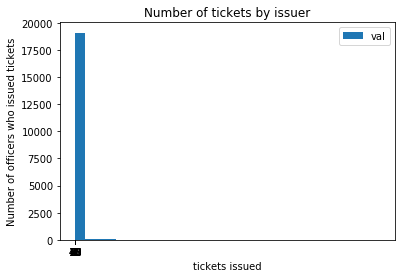

In [32]:
#add tick labels
df = pd.DataFrame({'lab':counts, 'val':counts})
ax = df.plot.hist(x='lab', y='val',bins = 30,  rot=0, title='Number of tickets by issuer')
ax.set_xlabel('tickets issued')
#plt.yticks(range(0, 10, 250), fontsize=8)
plt.xticks(range(0,90, 5))
ax.set_ylabel("Number of officers who issued tickets")

In [33]:
single_day.shape

(3940, 31)

# What happened to the tickets issued these days

In [34]:
# Break down of tickets paid/unpaid/dismissed for december 26
ticket_status = single_day['ticket_queue'].value_counts().keys().tolist()
counts = single_day['ticket_queue'].value_counts().tolist()
print(single_day['ticket_queue'].value_counts())


Paid           2291
Notice          953
Define          387
Dismissed       267
Bankruptcy       21
Court            17
Hearing Req       4
Name: ticket_queue, dtype: int64


In [35]:
# Break down of tickets paid/unpaid/dismissed for June 9
ticket_status = june_friday['ticket_queue'].value_counts().keys().tolist()
counts = june_friday['ticket_queue'].value_counts().tolist()
print(june_friday['ticket_queue'].value_counts())

Paid          5058
Notice        1600
Define         701
Dismissed      613
Bankruptcy      80
Name: ticket_queue, dtype: int64


In [36]:
# Break down of tickets paid/unpaid/dismissed for June 10
ticket_status = june_saturday['ticket_queue'].value_counts().keys().tolist()
counts = june_saturday['ticket_queue'].value_counts().tolist()
print(june_saturday['ticket_queue'].value_counts())

Paid           2781
Notice         1019
Dismissed       427
Define          409
Bankruptcy       49
Hearing Req       1
Name: ticket_queue, dtype: int64


In [37]:
# This is the number of states/countries/providences 
#that are represented
mask = single_day.license_plate_state.nunique()
print('This many unique states were issued tickets Dec 26 2017 was', mask)

This many unique states were issued tickets Dec 26 2017 was 37


In [38]:
# This will tell us the number of officers who issued tickets dec 26

single_day.officer.nunique()
   

739

In [39]:
# This will tell us the number of officers who issued tickets june 9

june_friday.officer.nunique()

1036

In [40]:
# This will tell us the number of officers who issued tickets june 10

june_saturday.officer.nunique()


917

In [41]:
#used this while testing theory to understand what was happening
single_day['violation_location'].head()

0       3473 N CLARK
1     2410 W CATALPA
2    23 W HUBBARD ST
3    3616 E 107TH ST
4      8435 S DREXEL
Name: violation_location, dtype: object

In [42]:
#this tallies tickets by violation type on Dec 26
single_day.violation_description.value_counts().head()


EXP. METER NON-CENTRAL BUSINESS DISTRICT              684
EXPIRED PLATE OR TEMPORARY REGISTRATION               682
RESIDENTIAL PERMIT PARKING                            490
EXPIRED METER CENTRAL BUSINESS DISTRICT               381
NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 LBS.    333
Name: violation_description, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54],
 <a list of 55 Text xticklabel objects>)

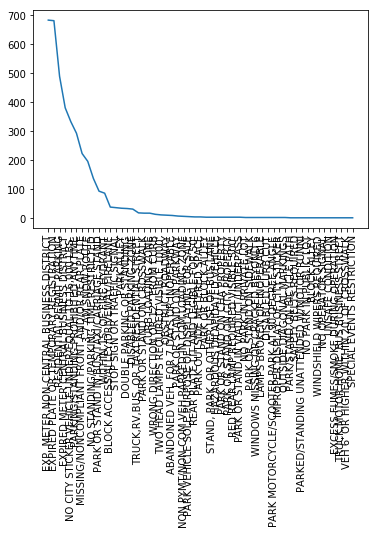

In [43]:
#want to be able to compare the top 2 values
plt.plot(single_day.violation_description.value_counts())
plt.xticks(rotation=90)

In [44]:
# This will tell us the number of officers who issued tickets

abc = single_day.officer.nunique()
print('This many different officers issued tickets {}'.format(abc))

This many different officers issued tickets 739


In [45]:
# this will tell us how many states were issued tickets
state = single_day['license_plate_state'].value_counts().keys().tolist()
counts = single_day['license_plate_state'].value_counts().tolist()
print(single_day['license_plate_state'].value_counts().head(2))

IL    3524
IN     102
Name: license_plate_state, dtype: int64


In [46]:
#this shows top 20 zip codes of residents who recieved parking tickets
uniqueZip = single_day['new_zipcodes'].value_counts().keys().tolist()
counts = single_day['new_zipcodes'].value_counts().tolist()
#print(single_day['new_zipcodes'].value_counts())
single_day.new_zipcodes

0       60657
1       60625
2       60654
3       60617
4       60619
5       60622
6       60657
7       60639
8       60647
9       60604
10      60625
11      60654
12      60611
13      60604
14      60622
15      60657
16      60654
17      60636
18      60654
19      60622
20      60657
21      60604
22      60637
23      60657
24      60657
25      60609
26      60649
27      60637
28      60626
29      60617
        ...  
3910    60610
3911    60608
3912    60608
3913    60608
3914    60608
3915    60628
3916    60626
3917    60626
3918    60620
3919    60626
3920    60632
3921    60620
3922    60624
3923    60624
3924    60620
3925    60632
3926    60620
3927    60618
3928    60620
3929    60617
3930    60620
3931    60620
3932    60618
3933    60614
3934    60619
3935    60657
3936    60608
3937    60614
3938    60614
3939    60614
Name: new_zipcodes, Length: 3940, dtype: int64

# Heat maps below

In [47]:
#tells folium to focus on lat/long of Chicago
def generateBaseMap (default_location=[41.895, -87.62], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [48]:
police_locations.head(2)

,DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,1,Central,1718 S State St,Chicago,IL,60616,http://home.chicagopolice.org/community/distri...,312-745-4290,312-745-3694,312-745-3693,1176569.052,1891771.704,41.858373,-87.627356,"(41.8583725929, -87.627356171)"
1,2,Wentworth,5101 S Wentworth Ave,Chicago,IL,60609,http://home.chicagopolice.org/community/distri...,312-747-8366,312-747-5396,312-747-6656,1175864.837,1871153.753,41.801811,-87.630560,"(41.8018110912, -87.6305601801)"


In [49]:
# dec 26 heat map friday
#set equal to 
#tells folium to focus on lat/long of Chicago

#this data we will see what area the top ticket issuer issued tickets in
december = single_day


m = folium.Map([41.8781, -87.6298], zoom_start=11)
m

# shows officer 759 area of tickets being issued
stationArr = december[['latitudes', 'longitudes']].as_matrix()

# mark each station as a point
for index, row in police_locations.iterrows():
    folium.CircleMarker([row['LATITUDE'], row['LONGITUDE']],
                        radius=5,
                        popup=row['DISTRICT NAME'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

# plot heatmap
m.add_children(plugins.HeatMap(stationArr, radius=15))
m

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.


In [50]:
# maps locations of police stations in chicago
m = folium.Map([41.8781, -87.6298], zoom_start=11)
m

# mark each station as a point
for index, row in police_locations.iterrows():
    folium.CircleMarker([row['LATITUDE'], row['LONGITUDE']],
                        radius=5,
                        popup=row['DISTRICT NAME'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)
# plot heatmap
m.add_children(plugins.HeatMap(stationArr, radius=15))
m

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  del sys.path[0]


# Locations of Police Stations within Chicago

In [51]:
#this data we will see what area the top ticket issuer issued tickets in
feet = single_day.loc[single_day['officer'] == '716']
feet.head(2)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,latitudes,longitudes,Datetime,hour,new_zipcodes


In [52]:
#tells folium to focus on lat/long of Chicago
m = folium.Map([41.8781, -87.6298], zoom_start=11)
m

# mark each station as a point
for index, row in police_locations.iterrows():
    folium.CircleMarker([row['LATITUDE'], row['LONGITUDE']],
                        radius=5,
                        popup=row['DISTRICT NAME'],
                        fill_color="#3db7e4",
                       ).add_to(m)

# shows officer 759 area of tickets being issued
stationArr = feet[['latitudes', 'longitudes']].as_matrix()

# plot heatmap
m.add_children(plugins.HeatMap(stationArr, radius=15))
m

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.


In [53]:
# june 9th heat map friday
#change m variable
#set equal to 
#tells folium to focus on lat/long of Chicago

#this data we will see what area the top ticket issuer issued tickets in
friday = june_friday


m = folium.Map([41.8781, -87.6298], zoom_start=11)
m

# mark each station as a point
for index, row in police_locations.iterrows():
    folium.CircleMarker([row['LATITUDE'], row['LONGITUDE']],
                        radius=5,
                        popup=row['DISTRICT NAME'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

# shows officer 759 area of tickets being issued
stationArr = friday[['latitudes', 'longitudes']].as_matrix()

# plot heatmap
m.add_children(plugins.HeatMap(stationArr, radius=15))
m

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.


In [54]:
# june 1th heat map saturday
#set equal to 
#tells folium to focus on lat/long of Chicago

#this data we will see what area the top ticket issuer issued tickets in
saturday = june_saturday
feet.head(2)

# mark each station as a point
for index, row in police_locations.iterrows():
    folium.CircleMarker([row['LATITUDE'], row['LONGITUDE']],
                        radius=5,
                        popup=row['DISTRICT NAME'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

m = folium.Map([41.8781, -87.6298], zoom_start=11)
m

# shows officer 759 area of tickets being issued
stationArr = saturday[['latitudes', 'longitudes']].as_matrix()

# plot heatmap
m.add_children(plugins.HeatMap(stationArr, radius=15))
m

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.


# Value of the tickets each day

In [55]:
#sum of tickets Dec 26
single_day['fine_level1_amount'].sum()


320730

In [56]:
june_friday['fine_level1_amount'].sum()

649065

In [57]:
june_saturday['fine_level1_amount'].sum()

388110

# Time series 

In [58]:
#start of the time series. I will create a data frame with the hour 
#column then I will map it.
dff = single_day['hour']

Text(0, 0.5, 'Number of tickets')

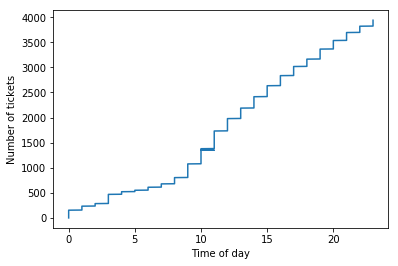

In [59]:
plt.plot(dff.values, dff.index.values)
plt.xlabel('Time of day');
plt.ylabel('Number of tickets')


In [60]:
single_day.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,latitudes,longitudes,Datetime,hour,new_zipcodes
0,0,0,0,9192680820,2017-12-16 00:00:00,3473 N CLARK,64746252b5c6e9ba5f5aab9e2b3b2b902ec05eec0de158...,IL,PAS,60633.0,0964080B,NO STANDING/PARKING TIME RESTRICTED,502,DOF,NISS,100,200,0.0,100.0,Paid,2018-02-06 00:00:00,DETR,NaN,5207011090,1109,"3400 n clark, chicago, il",41.945392,-87.655015,2017-12-16 00:00:00,0,60657
1,1,1,1,68894996,2017-12-16 00:00:00,2410 W CATALPA,afd361aee0cad191ecb238a7abebd592f8cdabf87196dc...,IL,PAS,60625.0,0964125B,"NO CITY STICKER VEHICLE UNDER/EQUAL TO 16,000 ...",20,CPD,NISS,200,400,0.0,200.0,Paid,2018-01-26 00:00:00,VIOL,NaN,5210312890,9014,"2400 w catalpa, chicago, il",41.981467,-87.690062,2017-12-16 00:00:00,0,60625
2,2,2,2,9192716841,2017-12-16 00:00:00,23 W HUBBARD ST,f289d12483fab8c2390391f66c263ff955ddc460e265bf...,IL,PAS,607071735.0,0964080B,NO STANDING/PARKING TIME RESTRICTED,502,DOF,HOND,100,200,200.0,0.0,Notice,2017-12-21 00:00:00,FINL,NaN,5208926530,1627,"1 w hubbard st, chicago, il",41.890037,-87.628991,2017-12-16 00:00:00,0,60654
3,3,3,3,68747771,2017-12-16 00:01:00,3616 E 107TH ST,95d5f5a9e311b5635ce06a4c1af0f444bd513474c180c5...,IL,PAS,606176701.0,0964150B,PARKING/STANDING PROHIBITED ANYTIME,4,CPD,GMC,75,150,0.0,75.0,Paid,2018-01-06 00:00:00,VIOL,NaN,5177215050,17916,"3600 e 107th st, chicago, il",41.700986,-87.535746,2017-12-16 00:01:00,0,60617
4,4,4,4,68683501,2017-12-16 00:01:00,8435 S DREXEL,5370eff877e020a28790b771d51776db00e117cbbdad9e...,IL,PAS,604151666.0,0976160B,EXPIRED PLATE OR TEMPORARY REGISTRATION,6,CPD,NISS,60,120,146.4,0.0,Notice,2017-12-28 00:00:00,SEIZ,NaN,5190742630,15972,"8400 s drexel, chicago, il",41.741100,-87.602481,2017-12-16 00:01:00,0,60619


Text(0.5, 0, 'time of day')

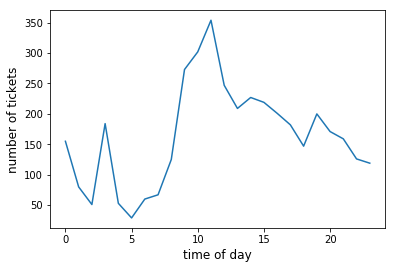

In [61]:
#group by hour 
yello = single_day.hour.value_counts().sort_index()

plt.plot(yello.index.values, yello.values)

plt.ylabel('number of tickets', fontsize=12)
plt.xlabel('time of day', fontsize=12)
# want to change the axis around

Text(0, 0.5, 'Number of tickets by hour')

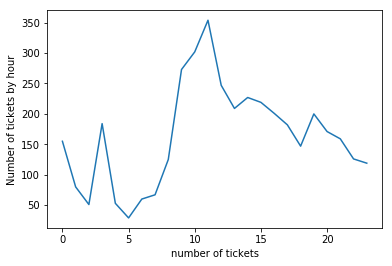

In [62]:
#group by hour 
x = single_day.hour.value_counts().sort_index()

plt.plot(x.index.values, x.values)
plt.xlabel('number of tickets');
plt.ylabel('Number of tickets by hour')
# want to change the axis around

In [63]:
yzz = december_saturday.hour.value_count().sort_index()

plt.plot(yzz.index.values, yzz.values)
plt.xlabel('number of tickets', fontsize=20);

AttributeError: 'DataFrame' object has no attribute 'hour'

In [ ]:
#machine learing part of the project
#1. take a day sample (june_friday)
#2. Pull sample for a spefic zip code
#3. perform a value count of each hour of that day
#4. Add up sums for each hour spent in the place
#5. Divide by total number of tickets for that day 


# Machine learning part

In [64]:
june_friday.head()

,Unnamed: 0,Unnamed: 0.1,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,new_zipcodes,latitudes,longitudes,Datetime,hour
0,0,0,68139029,2017-06-09 00:00:00,223 E MONTROSE HARBOR,7e264ef5900a5baca9a55f190ae8a669c37ead19aec08f...,IL,PAS,60613.0,0980130B,PARK IN CITY LOT WHEN CLOSED,19,CPD,CADI,50,100,0.0,-50.0,Paid,2018-02-15 00:00:00,DETR,Not Liable,5176346480,18634,"200 e montrose harbor, chicago, il",60640,41.963458,-87.637785,2017-06-09 00:00:00,0.0
1,1,1,9191901110,2017-06-09 00:00:00,22 E PEARSON ST,bff12d7d0db037418254067b9a257577b656473a6a58f1...,IL,PAS,NaN,0964190B,EXPIRED METER CENTRAL BUSINESS DISTRICT,502,DOF,TOYT,65,130,0.0,65.0,Paid,2017-06-12 00:00:00,NaN,NaN,0,1628,"1 e pearson st, chicago, il",60611,41.897567,-87.627312,2017-06-09 00:00:00,0.0
2,2,2,9191901954,2017-06-09 00:00:00,2125 W 22ND PL,afc9425fa5804469d3cf060b8f489d002aed6b308dbd89...,IL,PAS,NaN,0964090E,RESIDENTIAL PERMIT PARKING,502,DOF,DODG,75,150,0.0,0.0,Dismissed,2017-09-03 00:00:00,NaN,NaN,0,830,"2100 w 22nd pl, chicago, il",60608,41.851134,-87.679225,2017-06-09 00:00:00,0.0
3,3,3,68160524,2017-06-09 00:00:00,5023 S COLUMBUS DR,37aa6f1fd35f28be8a17b684b63490987aa861c01e8784...,IL,PAS,NaN,0964080B,NO STANDING/PARKING TIME RESTRICTED,1,CPD,CHEV,100,200,100.0,0.0,Define,2017-06-19 00:00:00,NaN,NaN,0,11206,"5000 s columbus dr, chicago, il",60605,41.869445,-87.620527,2017-06-09 00:00:00,0.0
4,4,4,9191901955,2017-06-09 00:02:00,2129 W 22ND PL,bd2f65e38a42048c487d87d4a125c4bbff552737420b35...,IL,PAS,606084117.0,0964090E,RESIDENTIAL PERMIT PARKING,502,DOF,FORD,75,150,0.0,75.0,Paid,2017-07-06 00:00:00,VIOL,NaN,5187271780,830,"2100 w 22nd pl, chicago, il",60608,41.851132,-87.679373,2017-06-09 00:02:00,0.0


In [65]:
zip_break_down = list,june_friday['new_zipcodes'].value_counts().keys().tolist()
counters = june_friday['new_zipcodes'].value_counts().tolist()
print(june_friday['new_zipcodes'].value_counts().head())

60657    449
60608    363
60614    326
60641    304
60647    294
Name: new_zipcodes, dtype: int64


# Naive Based Part of the Project

In [ ]:
# this cell and below is focused on figuring out the machine learning part of the project

In [66]:
#finds all tickets issued in zipcode 60657
test = june_friday[(june_friday ['new_zipcodes'] == 60657)]

In [67]:
test.shape

(449, 30)

In [68]:
#finds all tickets between 6 pm and midnight
my_mask = test[(test ['hour'] >= 18 ) & (test['hour'] < 24)]

In [69]:
morning = test[(test ['hour'] >= 0 ) & (test['hour'] < 6)]

In [70]:
my_mask.head(2)

,Unnamed: 0,Unnamed: 0.1,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,new_zipcodes,latitudes,longitudes,Datetime,hour
3042,3042,3042,9191809532,2017-06-09 10:24:00,1115 W SCHOOL,0f9b589b9d58f57186e1b524ce5d28e073b716a87be237...,MI,PAS,48085.0,0964040B,STREET CLEANING,498,DOF,JEEP,60,120,0.0,60.0,Paid,2017-06-14 00:00:00,NaN,NaN,0,720,"1100 w school, chicago, il",60657,41.941627,-87.657021,2017-06-09 10:24:00,18.0
3051,3051,3051,9191796123,2017-06-09 10:25:00,1410 W BELMONT AVE,47c15103c1d0a1463684386352ba021cb18735036dead5...,IL,PAS,606572042.0,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,729,Miscellaneous,CHEV,50,100,0.0,50.0,Paid,2017-06-21 00:00:00,VIOL,NaN,5190059220,1441,"1400 w belmont ave, chicago, il",60657,41.939746,-87.664311,2017-06-09 10:25:00,18.0


In [71]:
morning.head(2)

,Unnamed: 0,Unnamed: 0.1,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,new_zipcodes,latitudes,longitudes,Datetime,hour
19,19,19,68140749,2017-06-09 00:06:00,3240 N HALSTED,ede5298c71d7d7e5edf924e09116b964a222eed8009786...,IL,PAS,NaN,0964080B,NO STANDING/PARKING TIME RESTRICTED,19,CPD,HYUN,100,200,0.0,100.0,Paid,2017-06-13 00:00:00,NaN,NaN,0,6648,"3200 n halsted, chicago, il",60657,41.941313,-87.649345,2017-06-09 00:06:00,0.0
20,20,20,68140751,2017-06-09 00:07:00,3232 N HALSTED,098e35506aa3a6be096b41e3adf9f39cbc975dbabb9af7...,IL,PAS,60618.0,0964080B,NO STANDING/PARKING TIME RESTRICTED,19,CPD,HOND,100,200,0.0,100.0,Paid,2017-06-16 00:00:00,NaN,NaN,5187045070,6648,"3200 n halsted, chicago, il",60657,41.940765,-87.649326,2017-06-09 00:07:00,0.0


In [72]:
test.shape

(449, 30)

TypeError: unsupported operand type(s) for /: 'method' and 'method'

In [73]:
morning.shape

(4, 30)

In [74]:
my_mask.shape

(21, 30)

In [75]:
#number of tickets issued in 60657 on June 9th
test.shape

(449, 30)

In [76]:
june_friday.shape

(8052, 30)

In [77]:
#will not create an unnamed column each time.

#single_day.to_csv('appended_zipcode.csv',index=False)

In [78]:
#appends 'zipcode_new column to dataframe'
#single_day['zipcode_new'] = pd.Series(zip_codes)
single_day.head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,unit_description,vehicle_make,fine_level1_amount,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address,latitudes,longitudes,Datetime,hour,new_zipcodes
0,0,0,0,9192680820,2017-12-16,3473 N CLARK,64746252b5c6e9ba5f5aab9e2b3b2b902ec05eec0de158...,IL,PAS,60633.0,0964080B,NO STANDING/PARKING TIME RESTRICTED,502,DOF,NISS,100,200,0.0,100.0,Paid,2018-02-06 00:00:00,DETR,NaN,5207011090,1109,"3400 n clark, chicago, il",41.945392,-87.655015,2017-12-16,0,60657


In [79]:
#this block found zip codes for the 
#zip_codes = []
#count = 1
#for address in single_day['violation_location']:
    #if count == 2 :
        #break
    #ticket_address = '{}, Chicago, IL'.format(address)
    #geolocator = ArcGIS()
    #location = geolocator.geocode(ticket_address, timeout=1000)
    location = geolocator.reverse(location[1], timeout=1000)
    #print (location)
    try:
        zipcode = int(location[0].split()[-1].rstrip(','))
    except:
        location = geolocator.reverse(location[1], timeout=1000)
        zipcode = int(location[0].split()[-2].rstrip(','))
    zip_codes.append(zipcode)
    count +=1

NameError: name 'geolocator' is not defined

In [80]:


#this block still works. Feel free to refernce it later if other block breaks
#this shows top 20 zip codes of residents who recieved parking tickets
#uniqueZip = parking_data['zipcode'].value_counts().keys().tolist()
#counts = parking_data['zipcode'].value_counts().tolist()
#print(parking_data['zipcode'].value_counts().head())

In [81]:
# Do not run this cell
def get_zipcode(row):
    #address = '{}, Chicago, IL'.format(row['violation_location'])

    geolocator = ArcGIS()
   # location = geolocator.geocode(address, timeout=1000)
    time.sleep(5)
    try:
        zipcode = int(location[0].split()[-1].rstrip(','))
    except:
        location = geolocator.reverse(location[1], timeout=1000)
        zipcode = int(location[0].split()[-2].rstrip(','))

    return zipcode
for i in range(0,1):

    print(single_day.iloc[i]['ticket_number'])
    tn = single_day.iloc[i]['ticket_number']
    result = get_zipcode(single_day.iloc[i])
    print(result)
    single_day.at[tn,'new_zipcode'] = result

#     single_day.iloc[i]['new_zipcode'] = single_day.iloc[i].apply(get_zipcode, axis=1)

#     single_day.iloc[i] = single_day.iloc[i].drop(['Unnamed: 0', 'zipcode'], axis=1)

#     single_day.iloc[i].columns.values[-1] = 'zipcode'
#     single_day.iloc[i].head()



9192680820


UnboundLocalError: local variable 'location' referenced before assignment